In [5]:
import networkx as nx
from networkx.algorithms import bipartite
import seaborn as sns
import matplotlib.pyplot as plt
from src.helper import load_graph_from_json, draw_spring

# 1 Network Analysis: An Introduction

## 1.1 What Is Network Analysis?

Network analysis, which is also referred to as network or graph theory, concerns the study of relationships, often complex relationships. It can, among other things, assist in understanding structures (e.g., connections between individuals, organizations, documents, or viruses), identifying key players in the network (e.g., popular individuals, brokers that can connect entities), or examining spread (e.g., of information, diseases). Applications of network analysis can therefore be found in a variety of academic disciplines, including natural sciences, medical science, social sciences, humanities, and law. In molecular chemistry, network analysis can be used to examine atoms and how they can be connected through certain chemical bonds. In the medical field, network analysis can be used to track infections. And in social science research, one can map communication of a group of social media users (Figure 1). By mapping who communicates with whom, clusters may emerge of groups of users who more frequently communicate with entities within their cluster than with users outside of their cluster. It can also become apparent who is more central (popular) within the various clusters or in the network as a whole. Furthermore, one may identify so-called 'brokers', individuals who connect clusters of users and consequently form the glue that holds the network together.

<em>Figure 1: Example of social media network</em>

<img src="images/ch1/exampleofsocialmedia.png" alt="drawing" width="400"/>

<font size="2">(Source: Wikipedia)</font>

Network analysis concerns the measurement and mapping of relationships between entities. Entities can consist of individuals, groups of persons, court decisions, molecules, or any other subject or object. Network analysis relies on the assumption that the structural relationships between entities (e.g., persons) provide relevant information that the attributes of those entities alone cannot offer. The extent to which users are communicative, possess electronic devices, or are member of social platforms does not provide any or sufficient insight into how the users relate to one another. Network analysis reveals those relationships between entities, hence generating relevant information that the features such as communication skills or platform membership alone do not offer.

Below, we will start focusing on what network analysis can mean in a legal context and how it can be applied to such a context. Before we discuss this, we very briefly discuss the origins of network analysis.

## 1.2 Origins of Network Analysis

Network analysis stems from graph theory, for which the foundations were laid by Leonhard Euler in 1736. Euler proved that the problem of 'The Seven Bridges of Königsberg' (currently Kaliningrad, Russia) could not be solved. 

<img src="images/ch1/konigsberg.png" alt="drawing" width="400"/>

<font size="2">(Source: Google Maps)</font>

Königsberg was divided by the Pregel River, and it had two islands that were connected to each other and to the city's mainland by seven bridges. The mathematical problem that Euler solved was to design a walk that would include the two parts of the mainland as well as the two islands where the person would cross each of the bridges exactly once.

<img src="images/ch1/konigsberg_bridges.png" alt="drawing" width="150"/>

 ![image2](images/ch1/konisberg_bridges_2.png)
 
 ![image2](images/ch1/konisberg_bridges_3.png)

<font size="2">Source: Wikipedia</font>

Euler demonstrated that the 'Seven Bridges of Königsberg' problem does not have a solution. The possibility of having a walk through town while crossing every bridge exactly once, depends on the number areas (mainland + islands) and on the number of bridges. Euler proved that the desired walk could only take place if the areas are connected and include exactly zero or two areas with an odd number of bridges. Königsberg had four areas and seven bridges at the time. Three areas had three bridges and one area had five bridges. As a result, Euler's rule was violated, as there were four areas with an odd number of bridges.

The seven bridges were bombed in World War II. Five bridges were rebuilt. A Eulerian path became possible after the reconstruction (in the figure below: 1->2->3->4->5). Now, two areas (in the figure below: B+C) have two bridges, whereas the other two areas (in the figure below: A+D) have three bridges. This means that there are exactly two areas with an uneven number of bridges.

![images](images/ch1/konisberg_bridges_4.png)

<font size="2">Source: Wikipedia</font>

## 1.3 Research Questions for Legal Network Analysis

Network analysis focuses on relational patterns and structures that arise from interaction between the entities (called 'nodes). This approach allows analyzing a variety of networks, ranging from online cyber communities and corporate relations networks to social movements, political affiliations, sports clubs, and scholarly communities. Although there are many different categories of networks, they can more generally be grouped under the headings of technological networks (distribution, transportation, Internet), information networks (citation, discourse), and social networks (friends, professional) (Newman 2018).

Network analysis can also be a relevant approach in a legal context. We refer to these situations as legal network analysis. Various studies exist where it has been applied to examine citation patterns of courts to identify sub-topics and precedents within the network. The network analytical approach can also be relevant for other purposes, for instance when conducting research on organized crime syndicates and how they are organized.

Here, we illustrate the use of network analysis in the legal domain by means of several examples. Because legal network analysis often concerns the application to court decisions or legislation, this will be reflected in the examples that are discussed.

*Example 1*: In EU law, Van Gend en Loos (NV Algemene Transport- en Expeditie Onderneming van Gend & Loos v. Netherlands Inland Revenue Administration (1963) C-26/62) is considered one of the most important judgments, if not *the* most important judgment, ruled by the Court of Justice of the European Union (CJEU) in Luxembourg. In the judgment, the CJEU essentially held that European treaty law has direct effect against Member States, meaning that the Member States are directly bound by its provisions. The authors did not challenge the historical importance of Van Gend en Loos. Instead, they focused on the precedent value of this judgment and other CJEU decisions: Is a prior case used to resolve future disputes? To quantify the precedent value of CJEU judgments, the authors counted the number of citations from and to the cases and found that not Van Gend en Loos, but Bosman had harnessed the most citations. In the Bosman case (Union Royale Belge des Sociétés de Football Association ASBL v Jean-Marc Bosman (1995) C-415/93), the court ruled that FIFA's transfer fee system violated the free movement of workers. It overhauled the transfer system in football in the EU. The findings led the authors to wonder whether the importance of cases like *van Gend en Loos*, *Costa v. ENEL*, *Brasserie du Pêcheur*, and *United Brands* were overemphasized in the literature and the importance of cases like *Bosman* and *Dassonville* were underestimated.
*Source*: [M. Derlen and J. Lindholm (2014). Goodbye van Gend en Loos, Hello Bosman? Using Network Analysis to Measure the Importance of Individual CJEU Judgments. European Law Journal, 20(5), 667-87](https://doi.org/10.1111/eulj.12077)

*Example 2*: A seminal study in the field of legal network analysis analyzed the complete network of 30,288 majority opinions written by the U.S. Supreme Court and the citations in the opinions from 1754 to 2002. The authors found that reversed judgments are more important than other judgments, that judgments that overrule previous judgments become and remain more important, and that overruling decisions are grounded in past precedents. To explore the citation patterns over time, the authors partitioned the network based on periods (e.g., 1754-1800, 1754-1801, 1754-1802, etc.) and compared the citations for each of the partitions. This allowed the authors to, for instance, observe that some judgments would gather their citations in the first years after its publication whereas other judgments would continuously collect citations over time.
*Source*: [J. Fowler and S. Leon, ‘The Authority of Supreme Court Precedent’ (2008) 30 Social Networks 16-39](https://doi.org/10.1016/j.socnet.2007.05.001)

*Example 3*: In a study that analyzed 7,319 European Court of Human Rights (ECtHR) judgments up to and including 2006, the authors were, among other things, interested in the question of whether the judgments could be grouped based on substantive reasons (as opposed to the judgments being grouped based on, for instance, the respondent country). The authors found that the different communities consisted of different topics. For instance, one community consisted of judgments with the keywords 'life', 'effective remedy', 'positive obligation', and 'inhuman treatment', whereas other communities concerned procedural matters ('fair hearing', 'lawful arrest or detention', 'reasonable time') or fundamental freedoms ('freedom of expression', 'necessary in a democratic society', 'protection of the rights of others', 'respect for private life'). 
*Source*: [Y. Lupu and E. Voeten (2011). Precedent in International Courts: A Network Analysis of Case Citations by the European Court of Human Rights. British Journal of Political Science, 42, 413-49](https://doi.org/10.1017/S0007123411000433)

*Example 4*: Network analysis can be used to understand and address complex dynamics within a firm. A 1991 study on a corporate law firm with 71 lawyers (36 partners and 35 associates) in three offices provided perspectives on how partners foster cooperation, resolve conflicts, and preserve institutional stability. The study identified different leverage styles employed by partners, reflecting varying levels of seniority and approaches to managing control costs. 
*Source*: [E. Lazega, D. Krackhardt (2020). Spreading and Shifting Costs of Lateral Control Among Peers: A Structural Analysis at the Individual Level. Quality & Quantity 34, 153–175](https://doi.org/10.1023/A:1004759418226)

*Example 5*: Network analysis can also be used for intelligence and criminal investigations. One may identify central members and their roles in the network or map interactions between entities in the network. Different entities may be connected, for instance, individuals and addresses, addresses and crime locations, individuals and organizations, individuals and individuals (through communication), and crimes and crime features. This way, certain types of crimes may be clustered and connected to certain individuals, organizations, or types of individuals and organizations.
*Source*: [P. Seidler & R. Adderley (2013). Criminal Network Analysis inside Law Enforcement Agencies: A Data-Mining System Approach under the National Intelligence Model. International Journal of Police Science & Management, 15(4), 323–337](https://doi.org/10.1350/ijps.2013.15.4.321)

*Example 6*: Network analysis has also been used in patent studies, for instance, to test whether a certain inventor (e.g., Bill Gates) has invented in a wider variety of areas than another inventor (e.g., Mark Zuckerberg). This type of analysis can be carried out by computing the similarity score between inventions after having placed the inventor's creations within a semantic framework. The similarity scores can be used to construct an expertise network that visualizes the inventor's innovations along with their respective similarities. Such an analysis can yield insight into possible patent rights infringements.
*Source*: [R. Whalen, A. Lungeanu, L. DeChurch, and N. Contractor (2020). Patent Similarity Data and Innovation Metrics, Journal of Empirical Legal Studies 17(3), 615-639](https://doi.org/10.1111/jels.12261)


Based on the examples above, we can already identify a variety of possible research questions one may want to answer with legal network analysis:
<ul>
    <li>What are the most important precedents?</li>
    <li>How does case importance change over time?</li>
    <li>Have certain legal topics or legal concepts gained or lost importance over time?</li>
    <li>Which clusters of decisions can be distinguished?</li>
    <li>How do law firm partners exercise control over others in the firm?</li>
    <li>How can network analysis be used to provide relevant timely and actionable intelligence for criminal networks?</li>
</ul>

These sample questions illustrate that legal network analysis can be used for the empirical or computational studies of both positive law (law as it exists in codes and decisions) and of social phenomena relevant to the law (e.g., criminal networks, corporate influence).

## 1.4 Key Concepts of Network Analysis

### A) Nodes & Edges

Networks consist of two key concepts: nodes and edges. Nodes are the smallest unit in a network. As indicated above, nodes can consist of various types of entities: individuals, court cases, documents, words, etc. Edges are the links between two nodes. In graph representation, edges are presented with a line (in undirected graphs) or by an arrow (in directed graphs) that points from one node to another.

>Note that in the literature nodes can also be called vertices (singular: vertex). Edges are sometimes called lines or arcs. We use 'nodes' and 'edges' throughout this book, as these are the most commonly used terms used in network analysis, legal network analysis in particular.

### B) Undirected Graphs versus Directed Graphs
Graphs can be directed or undirected. Directed graphs record a non-reciprocal relationship. For instance, A sends a message to B, C admires D, or E cites F.

<img src="images/ch1/directed_graph.png" alt="drawing" width="150"/>

Undirected graphs consist of reciprocal relationships. A and B are friends (or: A is friends with B, B is friends with A), or A shakes hands with B. Similarity and difference, and closeness or distance can also be represented by undirected graphs. By logical necessity, the similarity between A and B is the same as that between B and A.

<img src="images/ch1/undirected_graph.png" alt="drawing" width="150"/>

### C) Network Visualization

We can make observations and inferences by looking at a network. However, when we later ask ourselves questions such as "which are the most central nodes in the network?", we should not lose track of the fact that networks can be drawn in different ways without changing their properties. 

Visualizations can even be misleading. The three plots below represent the exact same network (image from Wallis 2007, page 7). If one asks "which node is the most central one?" in relation to this particular network, the drawing on the left probably provides us the most insight and the one on the right is highly misleading (all the nodes in this network are equally central).

![image](images/ch1/equivalent_viz.png)

### D) Bipartite Graphs

Networks typically deal with relations between a single class of entities, that is to say, the nodes are of the same type, they belong to the same class. For example, we may be interested in citations between cases, friendship between persons, similarity between documents and so forth. In these examples, the entities within the classes used to measure citations, friendship, and similarity are the same.

Yet sometimes it is interesting to consider the relationship between two different types of elements. We might want to research, for example, patterns of treaty ratification. Modelling this requires working with two types of nodes: states and treaties. This implies the creation of a bipartite network, where edges connect nodes of a different type. These sorts of networks are sometimes also called affilation networks.

Below you can see an example of how a bipartite graph.

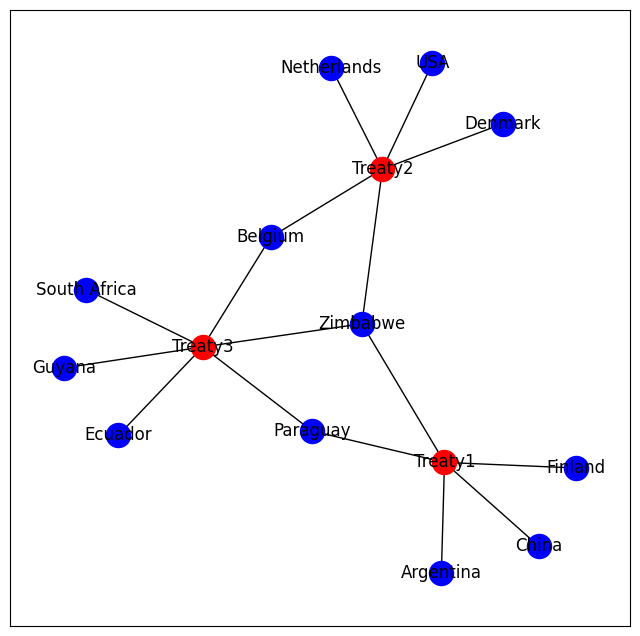

In [6]:
g_treaties = load_graph_from_json("data/g_treaties.json")
states = [x[0] for x in list(g_treaties.nodes(data="bipartite")) if x[1] == 0]
treaties = [x[0] for x in list(g_treaties.nodes(data="bipartite")) if x[1] == 1]
plt.figure(figsize=(8,8))
pos = nx.spring_layout(g_treaties, seed=123)
nx.draw_networkx_nodes(g_treaties, pos=pos, nodelist= states, node_color='blue')
nx.draw_networkx_nodes(g_treaties, pos=pos, nodelist= treaties, node_color='red')
nx.draw_networkx_edges(g_treaties, pos=pos)
nx.draw_networkx_labels(g_treaties, pos=pos);

### E) Directed Acyclic Graph (DAG)

Another special type of graph is a directed acyclic graph or DAG. A DAG is a directed graph that has no cycles or loops, hence it is "acyclic".

Citation networks, which are often used in legal network analysis, should in theory be DAGs, because newer cases will always cite older cases and never the other way around. Likewise, cases are unlikely to cite themselves. As a result, there should in theory be no loops in case citation networks. In practice, however, this does not hold. Sometimes an older case will cite a newer case if they have both been written around the same time. 

DAGs are important in some areas of research. For example, DAGs are used to model causal processes, on the understanding that causation is always linear and undirectional. To illustrate, we draw a toy example of a casual model that predicts a country will ratify a free trade treaty if the country is democratic, has a liberal government, has high unemployment, and a high percentage of young citizens. 

Notice that, in this model, the relationship is directional (we are not predicting that a country ratifying a free trade treaty will become democratic, or have a high percentage of youth) and not cyclic (once the free trade treaty is ratified, this does not, in turn, make it more likely that democracy will prevail).

This work does not delve further into DAGs.

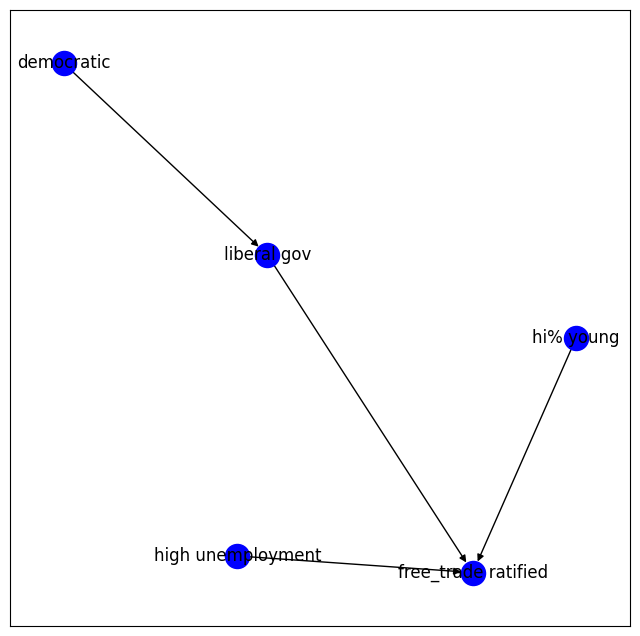

In [7]:
g_dag = nx.DiGraph()
g_dag.add_edge("democratic", "liberal gov")
g_dag.add_edge("liberal gov", "free_trade ratified")
g_dag.add_edge("hi% young", "free_trade ratified")
g_dag.add_edge("high unemployment", "free_trade ratified")

draw_spring(g_dag)

### F) Trees

There are many types of trees. An intuitive one is the "rooted tree", which parallels what we may naively understand as a tree: graphs without loops, with a single root node, and where the nodes are connected (directly or indirectly). 

Trees can have a parameter controlling in how many segments they branch out, and another controlling their height or depth, that is in this case, how far away the furthest leaf is from the root. Here we can see a binary tree of height 5.

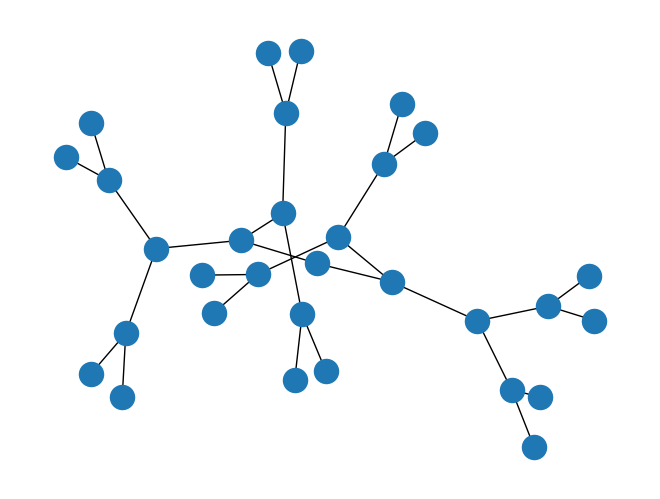

In [14]:
g_tree = nx.balanced_tree(r = 2, h= 4)
nx.draw(g_tree)

Trees can be directed or undirected. Directed trees can flow from the root out towards the leaves, or vice versa, flow from the leaves into the root. Trees are not necessarily rooted.  

There is a great variety of trees, and the tree data structure is widely used by many disciplines. This work does not delve further into trees.

### G) Graphs versus Networks

Graphs and networks are sometimes used interchangeably. However, the terms point to different aspects of the graph structure and to different fields of study. 

At the graph level, it is irrelevant wether the nodes and edges represent friendship relations, connections between subway stations, or participation in a criminal organization. The focus is on the nodes and edges are considered abstractly. Graph theory is a field of mathematics that explores the abstract properties of graphs.

Networks are based on graphs (hence on nodes and edges), but they are used to study concrete relationships between entities: treaty ratifications by states, citations between court cases, similarity between documents, etc. Moreover, the nodes and edges can be enriched with even more information (which may be called metadata, see Chapter 2, sections 5 and 6). For example, if nodes consist of documents, a network might record the language of the documents, the name of the authors, the year of publication, etc.

The demarcation between graphs and networks is not watertight, yet it is important to consider the sometimes subtle differences between the two.

### H) Power Law Distribution

Networks frequently have a Power Law distribution. A Power Law distribution entails that the frequency distributions of network properties are highly skewed. For example, it is common in legal network analysis, particularly the analysis of citation networks, that a few nodes have a very high number of edges and most nodes a small number of edges. We illustrate this by means of a network of  Court of Justice of the European Union (CJEU) case law, where the source nodes consist of cases that are labeled as 'consumer protection'. With source nodes, we mean the cases that were searched and for which the citations in those cases were harvested. In this network, the cases are the nodes and the references in and to the cases the edges. The network consists of 1,614 nodes (cases) and 2,662 edges (references).

Below, we plot the distribution of incoming citations among the cases by means of a histogram. The horizontal axis shows the number of incoming citations and the vertical axis the number of cases. The results reveal that a relatively small number of cases have a relatively high number of incoming citations (the sparse right tail of the histogram recording 40 or more citations), whereas there are a lot of cases that are hardly ever, if at all, cited (the towering bar recording cases with around 0 citations).


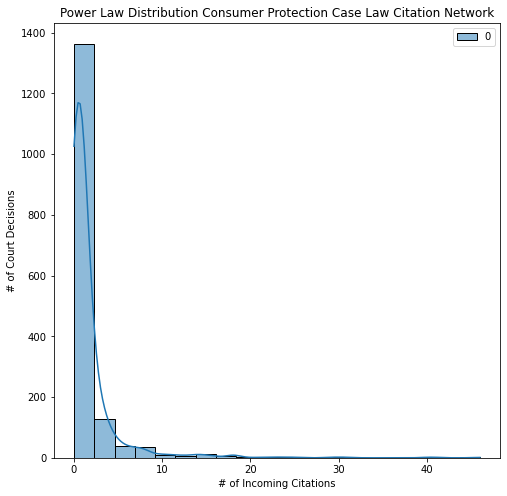

In [ ]:
g_consprot = load_graph_from_json("data/g_consprot.json")
plt.figure(figsize=(8,8))
plt.title("Power Law Distribution Consumer Protection Case Law Citation Network")
plt.xlabel("# of Incoming Citations") #add label
plt.ylabel("# of Court Decisions") #add label
sns.histplot(dict(g_consprot.in_degree).values(), stat="count", bins=20, kde=True); 

Such power law distribution is an empirical fact of certain networks such as citation networks or social networks. It manifests a form of preferential attachment or a 'rich get richer' effect: the nodes with many edges are likely to receive more edges (eg citations) in the future for the mere fact that they already had many edges before. 
>Note that "law" in power law distributions refers to something akin to a "law of nature". It does not have anything to do with the law as in norms or rules.

### I) Node Degree and Node Centrality

Network analysis is a method to capture how central a node is in a network. This centrality can be an indicator of, for instance, the popularity or relevance of a node in a network.

We will discuss different metrics in more detail in Chatper 3 of this manual. For now, it key to note that there may be more than one way of being "central". Intuitively compare nodes 3, 5 and 7 in the Krackhard kite graph below. Which one is the most important?

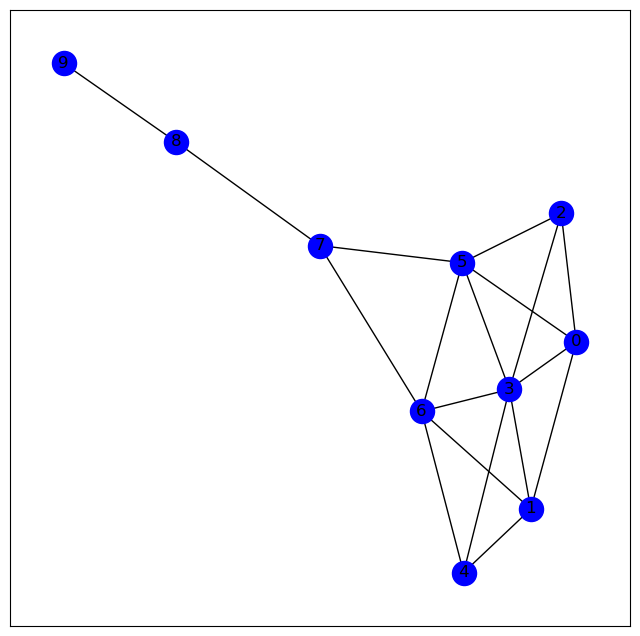

In [ ]:
g_kite = nx.krackhardt_kite_graph()
draw_spring(g_kite)

Importance can be measured in different ways. One way of considering importance is to consider the number of neighboring edges. It is also possible to consider how close a node is to every other node, how to reach every other node in the network in the least number of steps, or which nodes form the glue that keep the network together (strength of weak ties).

### J) Community Detection

Network analysis allows for the detection of communities in networks, which are sometimes also called "cliques"  or "clusters". 

The idea behind community detection is to group together nodes that are tightly connected to each other. In most scenarios, that means that the level of connection within the nodes of a particular community will be higher than outside of it. 

Nodes that belong to the same community are likely to share common attributes or functions, and they often possess different properties than the larger network.

<img src="images/ch1/community_detection.png" alt="drawing" width="250"/>

Various algorithms exist to detect communities. A type of such algorithms works using modularity maximization. Modularity is a measure that records the density of connections (edges) within a hypothesized community. We will explain later in this book how a modularity maximization algorithm tries different partitionings of the network and keep those that satisfy a certain condition. 

The Louvain Communities algorithm, which will be discussed in Chapter 4, is a popular community detection algorithm. As will be explained later in the book, the Louvain algorithm partitions the network into potential communities incrementally, keeps the partitions as long as they increase the modularity score, and stops when increases stop, or when they drop bellow a set threshold.

There are also other ways to find communities in networks that are not based on modularity, but on using traditional machine learning algorithms in a mathematical representation of the network (a *network embedding*). Examples of this approach will also be presented in Chapter 4.